In [5]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cv2.__version__
cv2.ocl.setUseOpenCL(False)

In [7]:
imgCenter = cv2.imread('SourceImages/stitch_m.png', 0)
imgRight  = cv2.imread('SourceImages/stitch_r.png', 0)
imgLeft   = cv2.imread('SourceImages/stitch_l.png', 0)
imgCenter = cv2.copyMakeBorder(imgCenter,200,200,500,500,cv2.BORDER_CONSTANT)

In [10]:
def drawMatches(img1, kp1, img2, kp2, matches): 
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]
    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])
    for mat in matches:
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (0,255,0), 2)
    return out

1312
1608


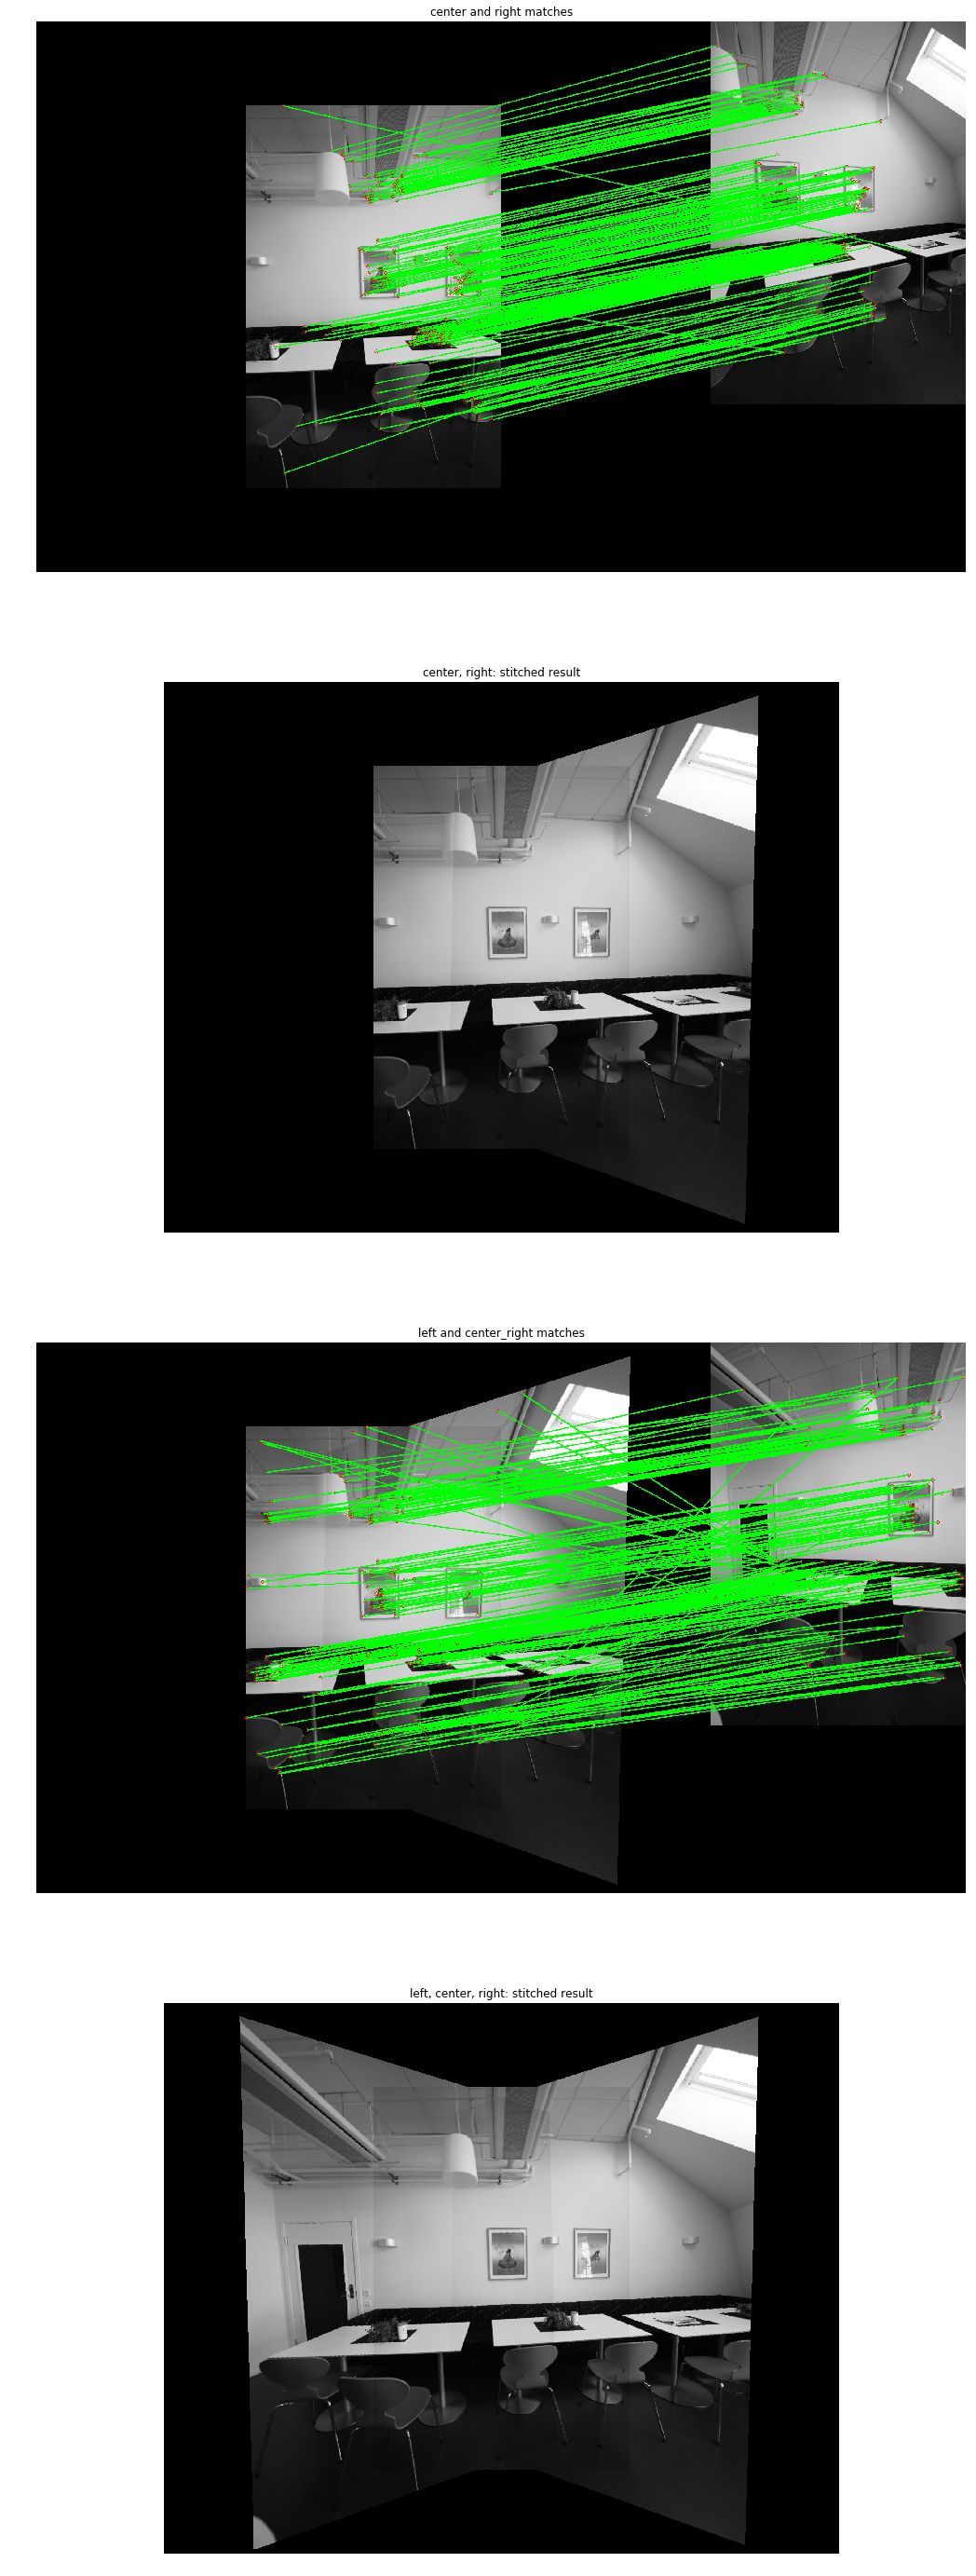

In [135]:
imgCenter = cv2.imread('SourceImages/stitch_m.png', 0)
imgRight  = cv2.imread('SourceImages/stitch_r.png', 0)
imgLeft   = cv2.imread('SourceImages/stitch_l.png', 0)
# initalize the stitched image as the center image
imgCenter = cv2.copyMakeBorder(imgCenter,200,200,500,500,cv2.BORDER_CONSTANT)


def toImage(img_input):
    img_input.astype(np.uint8)
    new_image_red =img_input
    new_image_blue = img_input
    new_image_green=img_input
    new_rgb = np.dstack([new_image_red, new_image_green, new_image_blue])
    img_input=new_rgb
    img_input=img_input.astype(np.uint8)
    img_input=cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)
    return img_input


def OverLap(img1,img2):
    imgMask1=np.zeros(img1.shape, dtype=int)
    imgMask2=np.zeros(img2.shape, dtype=int)
    imgMask_total=np.zeros(img1.shape, dtype='uint8')
    rows1=imgMask1.shape[0]
    cols1=imgMask2.shape[1]
    for x in range(0, rows1):
        for y in range(0, cols1):
            if (img1[x][y]!=0):
                imgMask1[x][y]=-1
            if(img2[x][y]!=0):
                imgMask2[x][y]=-1
    for x in range(0, rows1):
        for y in range(0, cols1):
            if (imgMask1[x][y]==-1 & imgMask2[x][y]==-1):
                imgMask_total[x][y]= 255
    imgMask_total=imgMask_total.astype('uint8')
    return imgMask_total


# blend two images
def alpha_blend(img, warped):
    overLap_range=OverLap(img,warped) # overlap index range 
    overLap_img=np.zeros(img.shape, dtype='uint8')
    overLap_warped=np.zeros(img.shape, dtype='uint8')
    NonoverLap_img=np.zeros(img.shape, dtype='uint8')
    NonoverLap_warped=np.zeros(img.shape, dtype='uint8')
    row=img.shape[0]
    col=img.shape[1]
    for x in range(0, row):
        for y in range(0, col):
            if (overLap_range[x][y]==255):
                overLap_img[x][y]=img[x][y]
                overLap_warped[x][y]=warped[x][y]
            if(overLap_range[x][y]!=255):
                NonoverLap_img[x][y]=img[x][y]
                NonoverLap_warped[x][y]=warped[x][y]
#     plt.figure(figsize=(25,50))
#     plt.imshow(overLap_img)
#     plt.title("overLap_img")
#     plt.axis('on')
# #     plt.imshow(overLap_warped),plt.show()
#     plt.figure(figsize=(25,50))
#     plt.imshow(overLap_warped)
#     plt.title("overLap_warped")
#     plt.axis('on')
# #     plt.imshow(NonoverLap_img),plt.show()
#     plt.figure(figsize=(25,50))
#     plt.imshow(NonoverLap_img)
#     plt.title("NonoverLap_img")
#     plt.axis('on')
# #     plt.imshow(NonoverLap_warped),plt.show()
#     plt.figure(figsize=(25,50))
#     plt.imshow(NonoverLap_warped)
#     plt.title("NonoverLap_warped")
#     plt.axis('on')
# #     plt.imshow(NonoverLap_img+NonoverLap_warped),plt.show()
#     plt.figure(figsize=(25,50))
#     plt.imshow(NonoverLap_img+NonoverLap_warped)
#     plt.title("NonoverLap_img+NonoverLap_warped)")
#     plt.axis('on')
    blended=NonoverLap_img+NonoverLap_warped+0.5*overLap_img+0.5*overLap_warped
    return blended

def Laplacian_Blending(A, B, mask, num_levels=6):
    # assume mask is float32 [0,1]

    # generate Gaussian pyramid for A,B and mask

    # generate Laplacian Pyramids for A,B and masks

    # Now blend images according to mask in each level

    # now reconstruct

    return blended

def getTransform(img1, img2): # img1 is the bigger img, img2 is the smaller one
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    good_matches = [] 
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good_matches.append(m)
    img_match=drawMatches(img1, kp1, img2, kp2, good_matches)
    if len(good_matches) > 4:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
        H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC,5.0) #cv2.RANSAC
    else:
        print "Not enough matches are found - %d/%d" % (len(good_matches),4)
    return H,img_match

def getTransform2(img1,img2):
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    good_matches = [] # Append filtered matches to this list
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good_matches.append(m)
    img_match=drawMatches(img1, kp1, img2, kp2, good_matches)
    if len(good_matches) > 4:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
        rot, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC,5.0) #cv2.RANSAC
    else:
        print "Not enough matches are found - %d/%d" % (len(good_matches),4)
    return rot, img_match
    
def perspective_warping(imgCenter, imgLeft, imgRight):    
    T_R2C, img_match1 = getTransform(imgCenter,imgRight)
    row=imgCenter.shape[0]
    print(row)
    col=imgCenter.shape[1]
    print(col)
    warp_right=cv2.warpPerspective(imgRight, H, (col,row), cv2.WARP_FILL_OUTLIERS, 200) # right image warped
    stitched_cr=alpha_blend(imgCenter, warp_right)
    stitched_cr=toImage(stitched_cr)
    T_L2CR, img_match2 = getTransform(stitched_cr,imgLeft)
    warp_left=cv2.warpPerspective(imgLeft, rot, (col,row), cv2.WARP_FILL_OUTLIERS, 200)
    stitched_res=alpha_blend(stitched_cr, warp_left)
    return stitched_res, stitched_cr, img_match1, img_match2

# def perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight):
    
#     # Get homography from right to center
    
#     # Blend center and right
#     # ===== This is your first bonus output =====
#     stitched_cr = # call Laplacian_Blending to stitch the center and right image
    
#     # Get homography from left to stitched center_right
    
#     # Blend left and center_right
#     # ===== This is your second bonus output =====
#     stitched_res = # call Laplacian_Blending to stitch the stitched_cr and left image
    
#     return stitched_res, stitched_cr


# # # ====== Plot functions, DO NOT CHANGE =====
stitched_res, stitched_cr, img_match1, img_match2 = perspective_warping(imgCenter, imgLeft, imgRight)
# # stitched_res_lap, stitched_cr_lap = perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight)
        
plt.figure(figsize=(25,50))
plt.subplot(4, 1, 1)
plt.imshow(img_match1,'gray')
plt.title("center and right matches")
plt.axis('off')
plt.subplot(4, 1, 2)
plt.imshow(stitched_cr,'gray')
plt.title("center, right: stitched result")
plt.axis('off')
plt.subplot(4, 1, 3)
plt.imshow(img_match2,'gray')
plt.title("left and center_right matches")
plt.axis('off')
plt.subplot(4, 1, 4)
plt.imshow(stitched_res,'gray')
plt.title("left, center, right: stitched result")
plt.axis('off')
plt.show()

# plt.figure(figsize=(25,50))
# plt.subplot(2, 1, 1)
# plt.imshow(stitched_cr_lap)
# plt.title("Bonus, center, right: stitched result")
# plt.axis('off')
# plt.subplot(2, 1, 2)
# plt.imshow(stitched_res_lap)
# plt.title("Bonus, left, center, right: stitched result")
# plt.axis('off')
# # =============================================

1312
1608


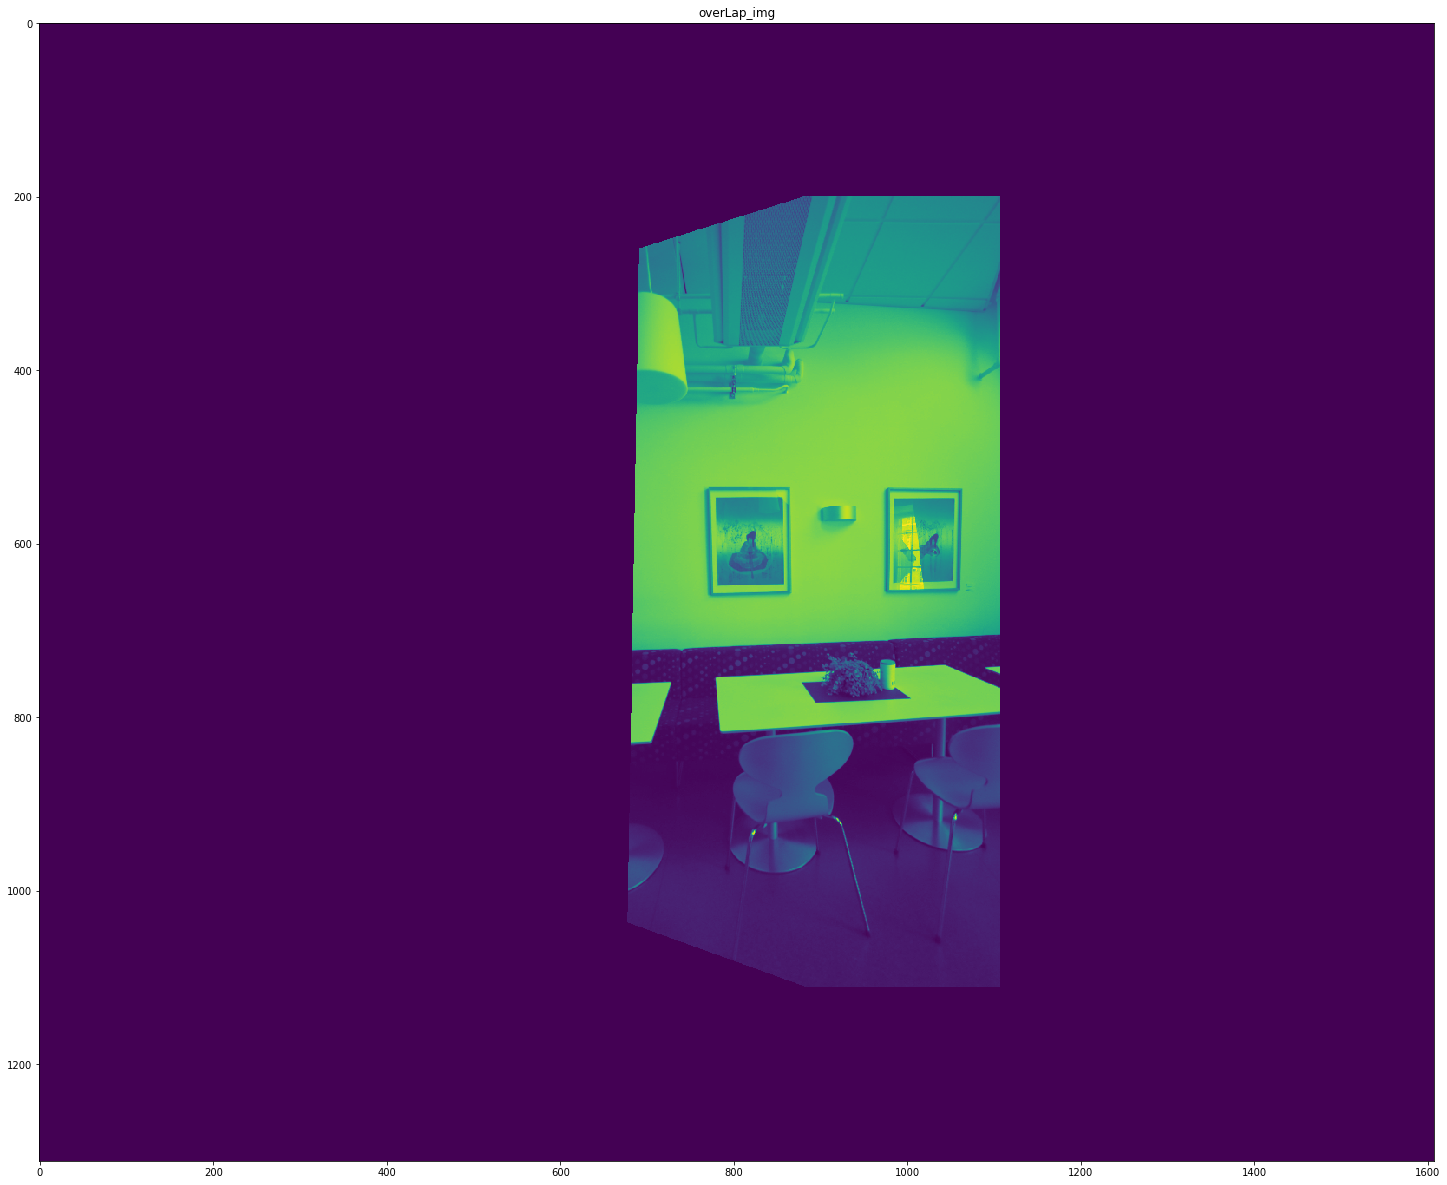

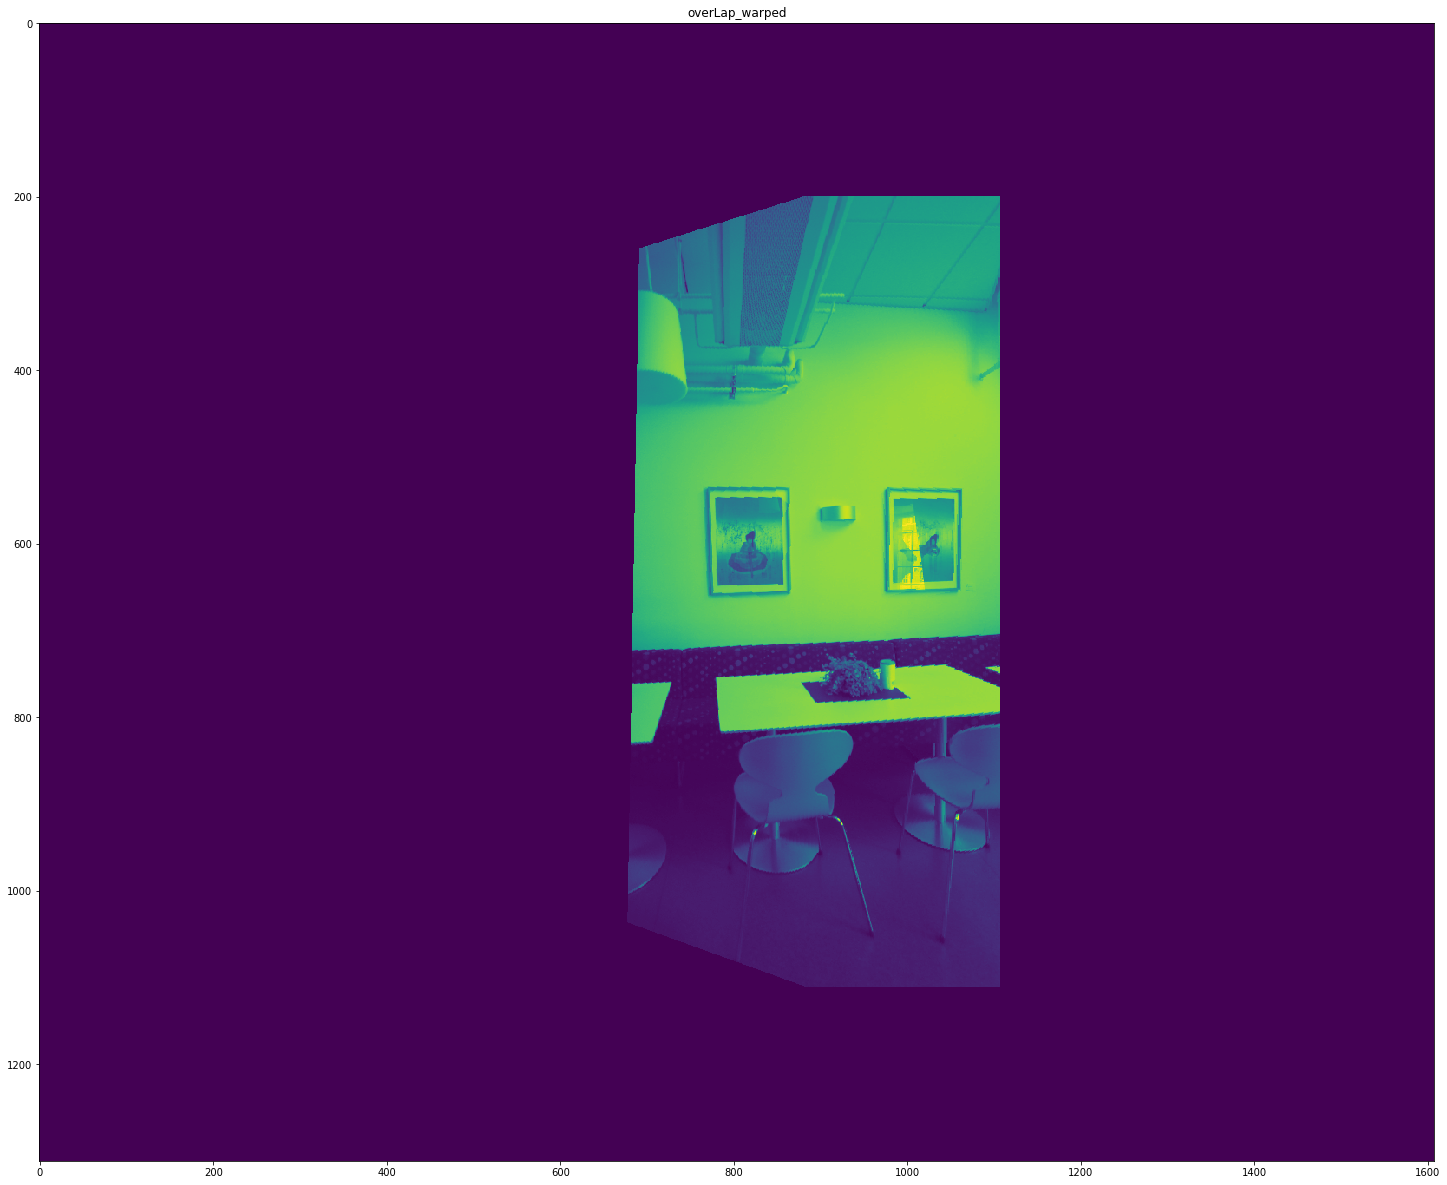

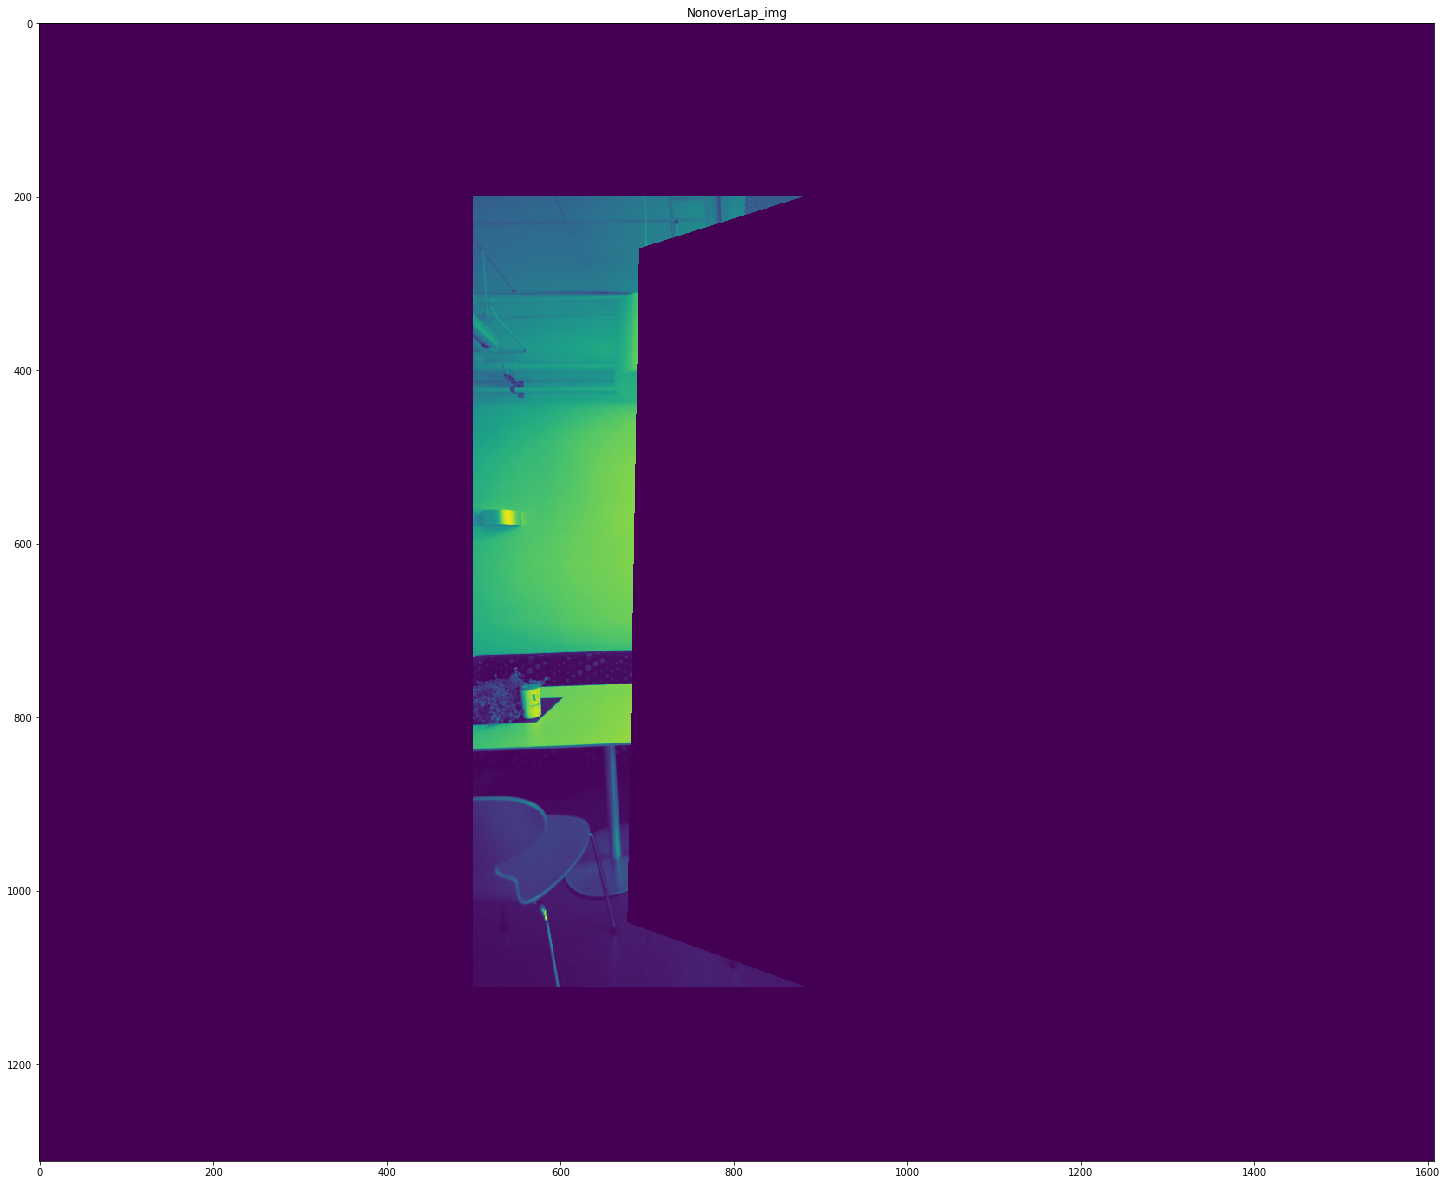

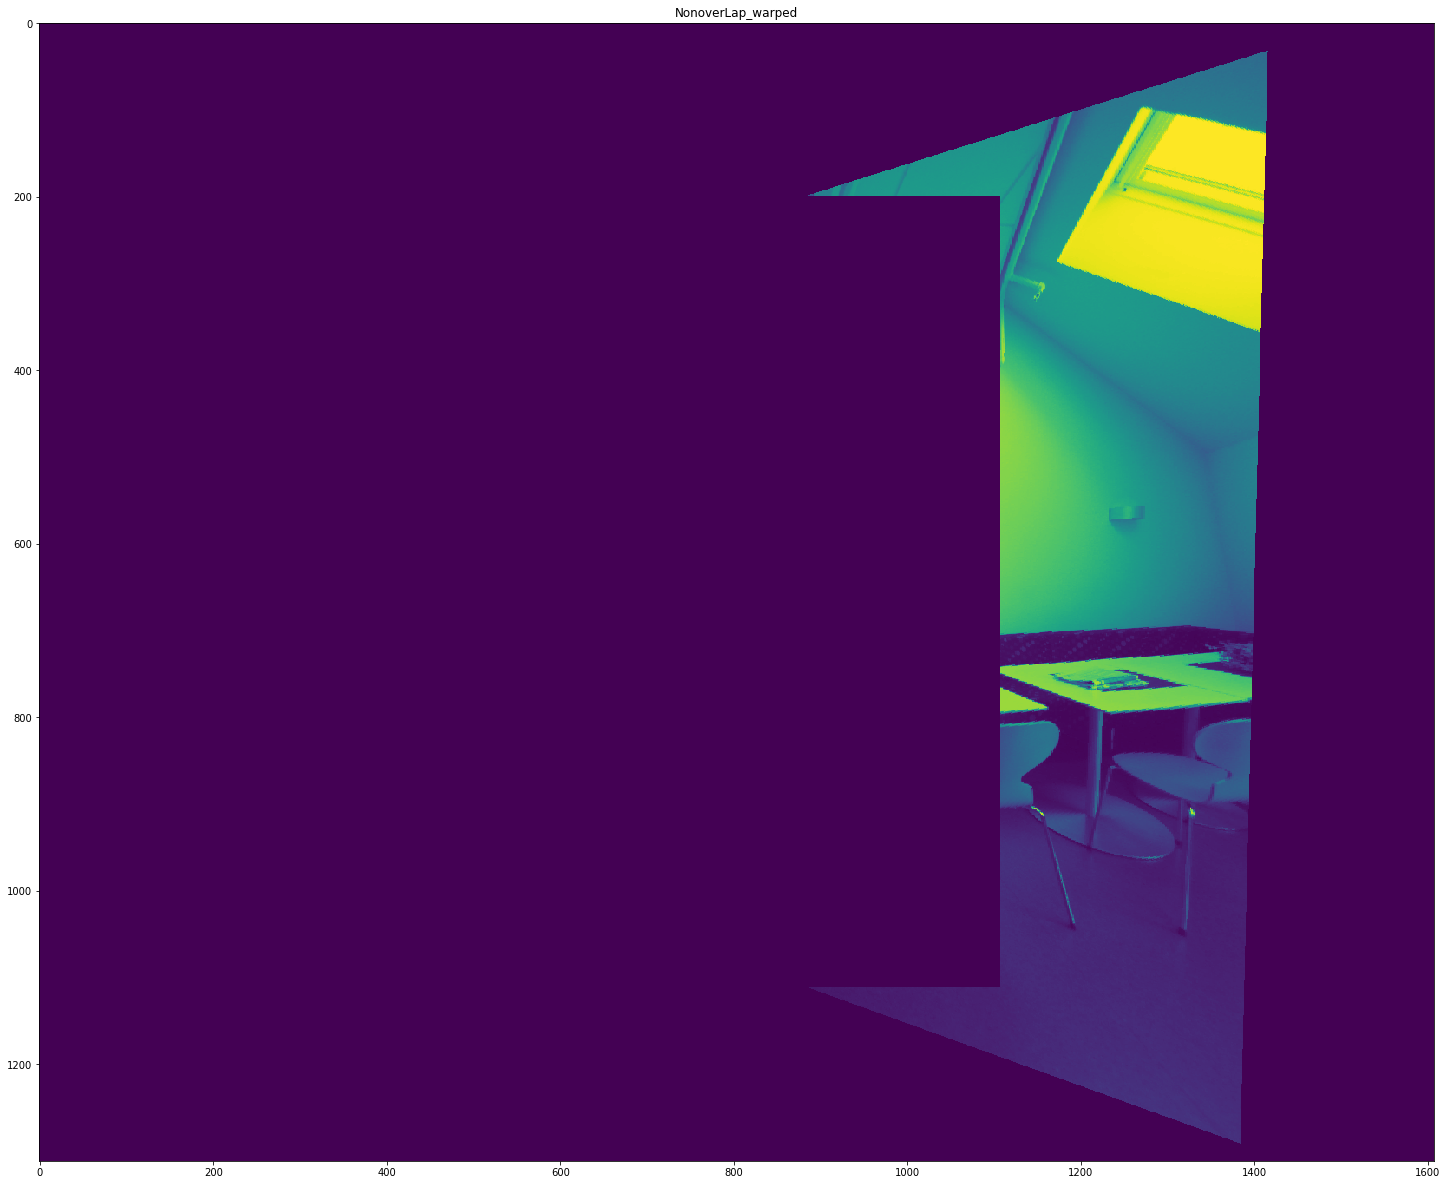

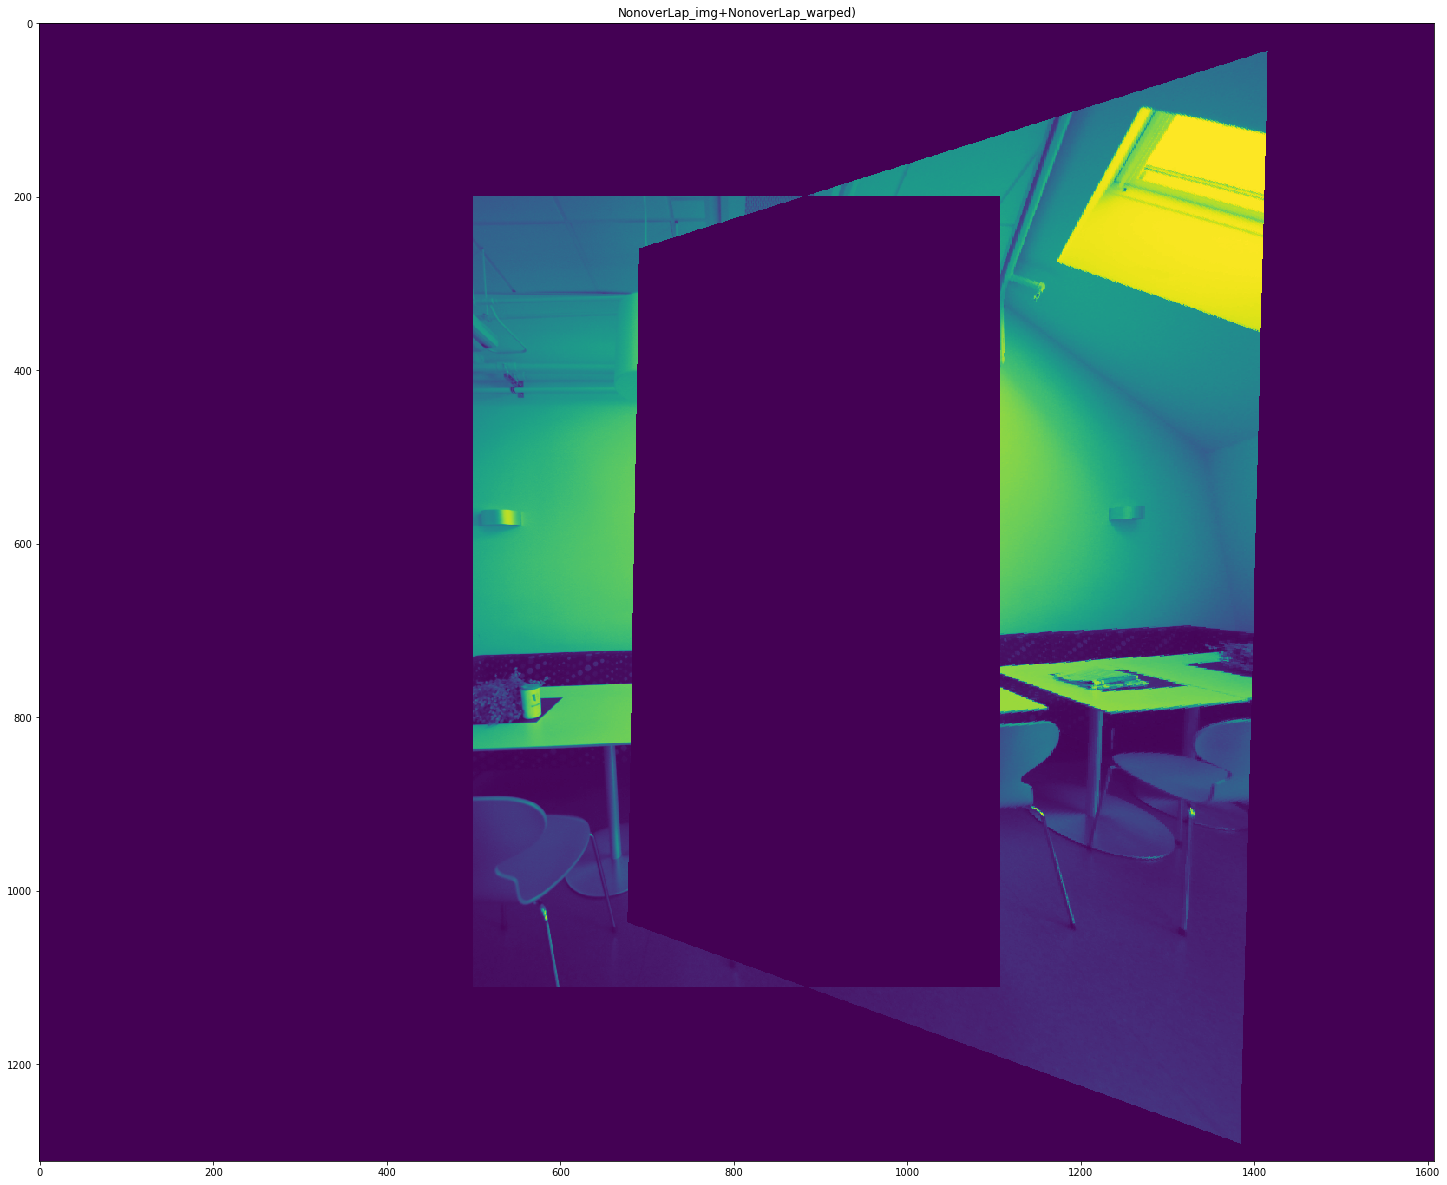

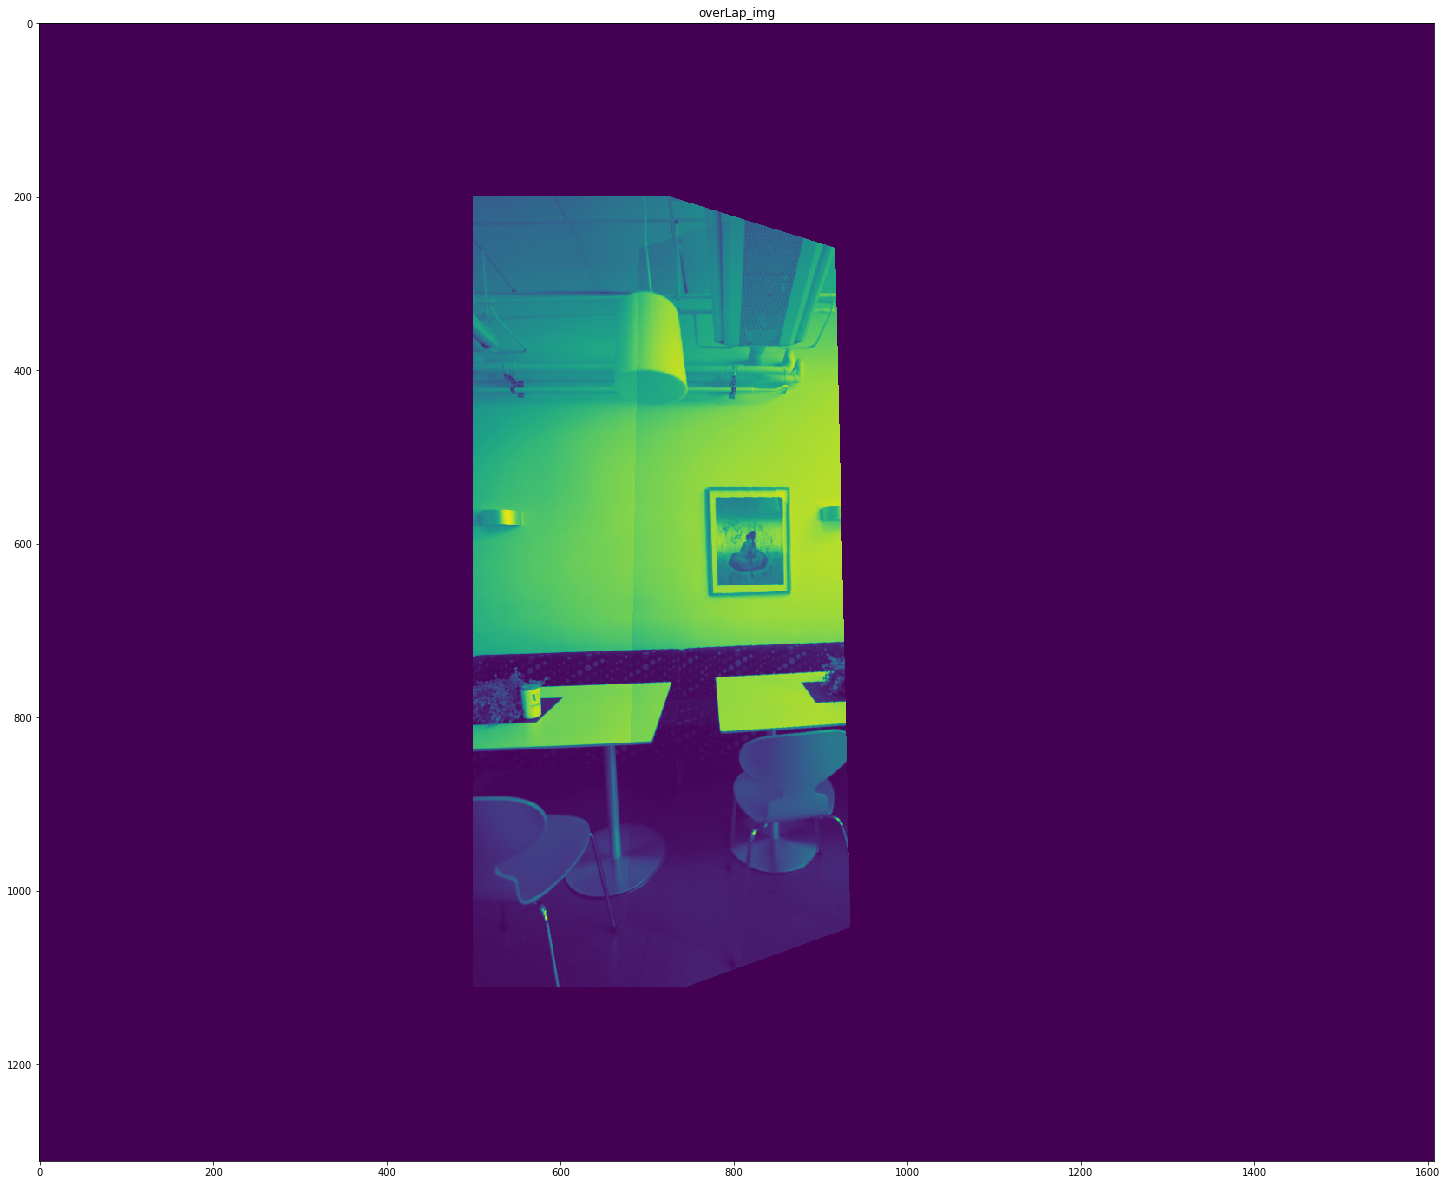

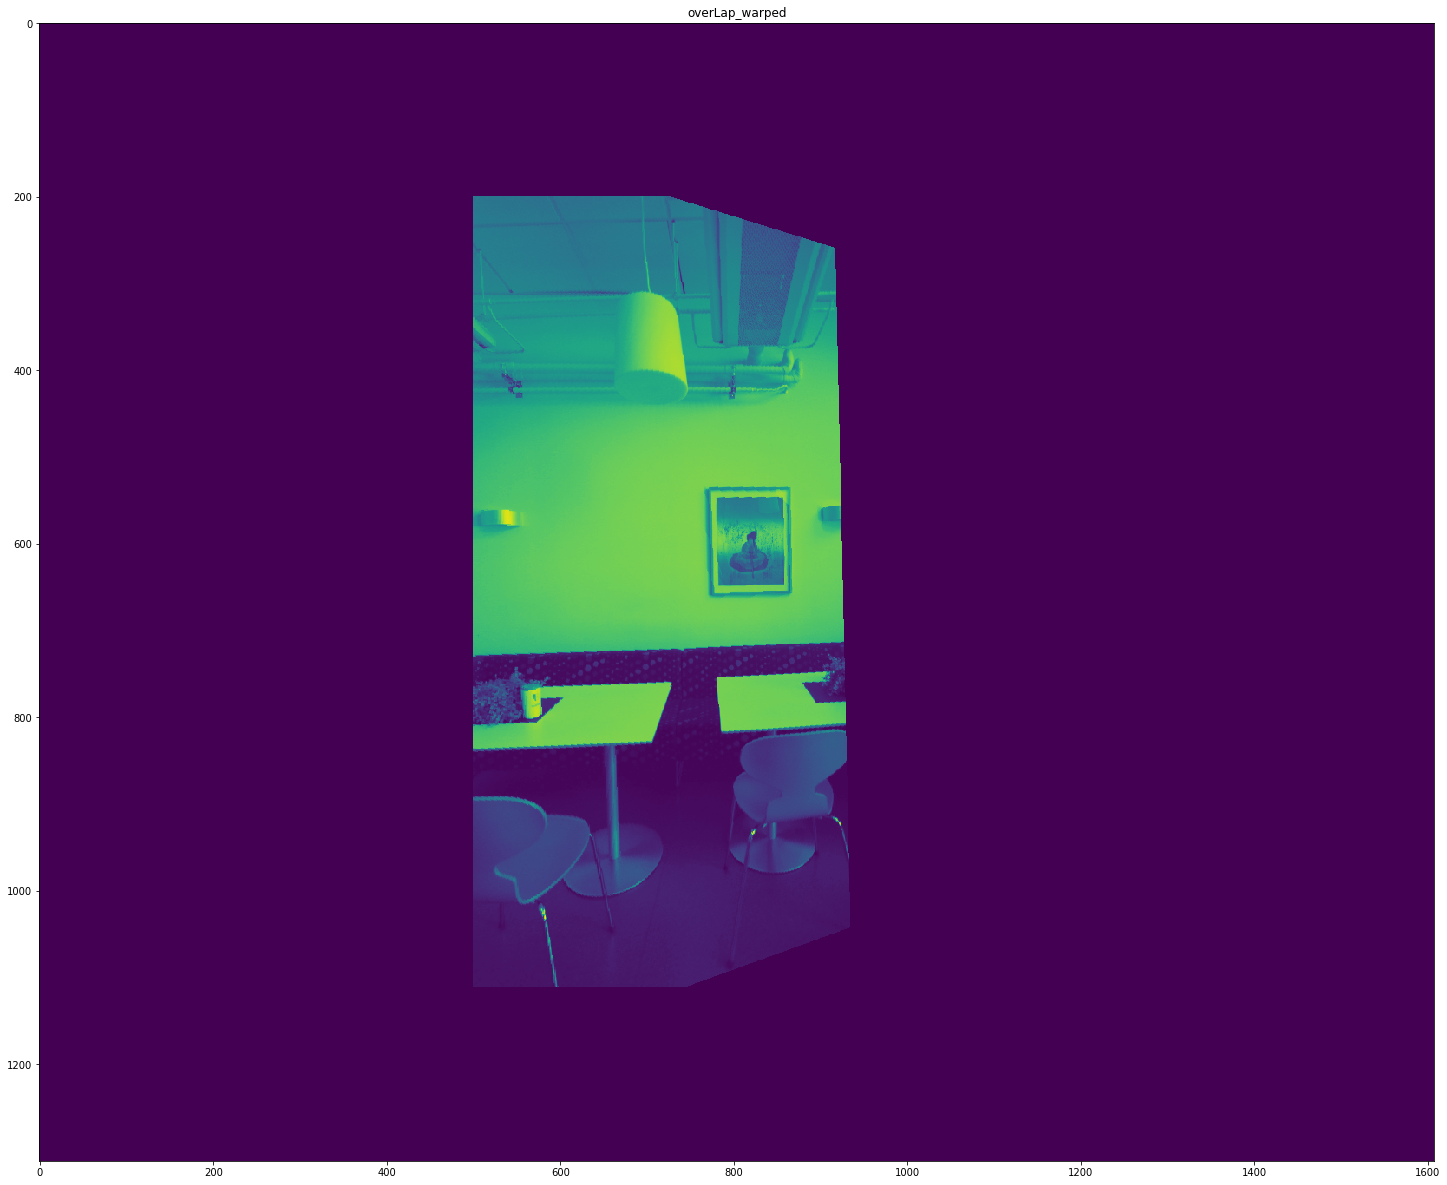

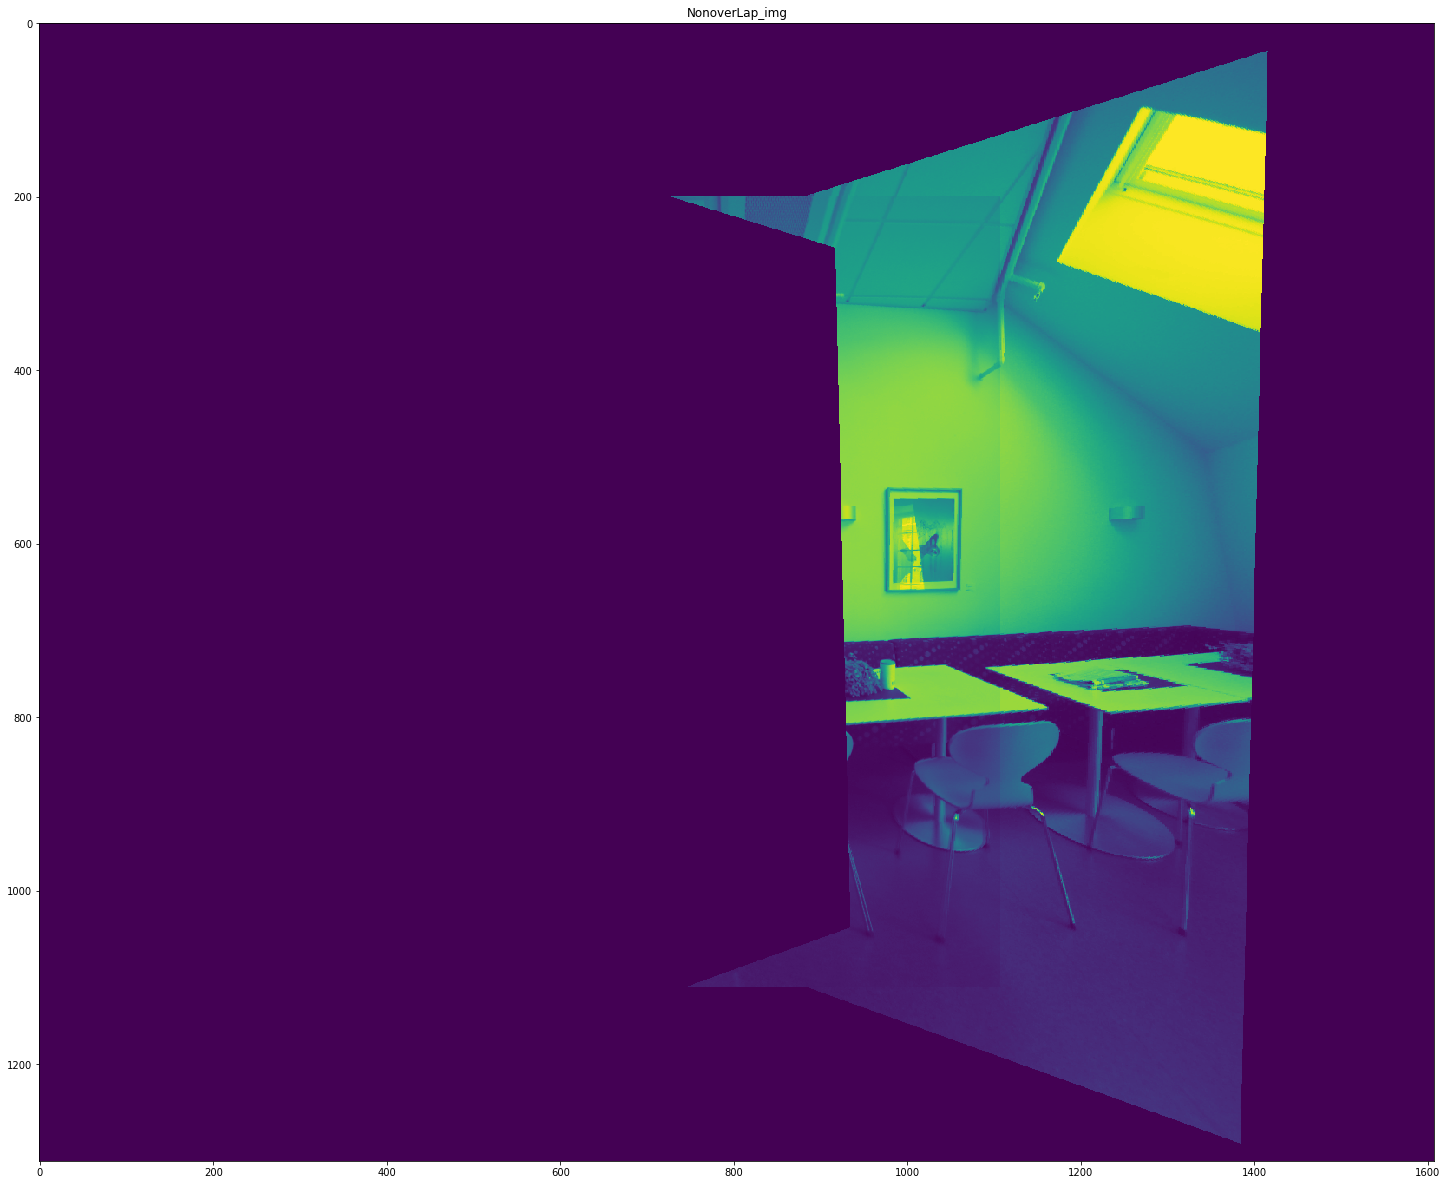

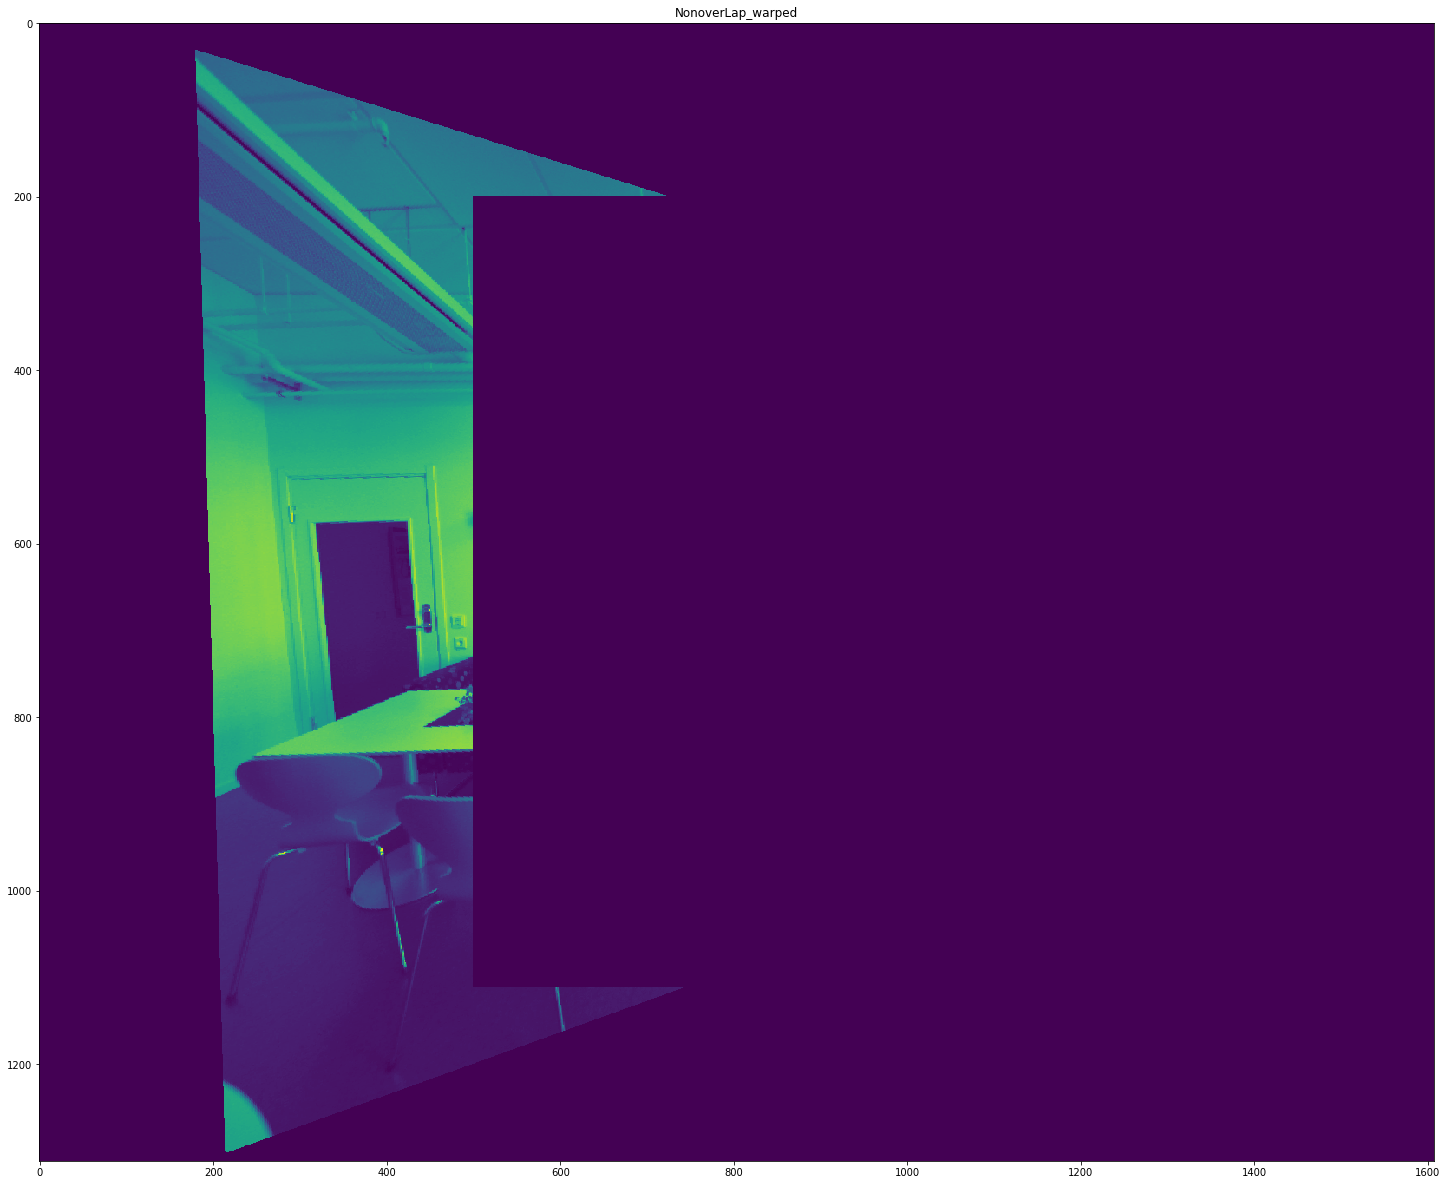

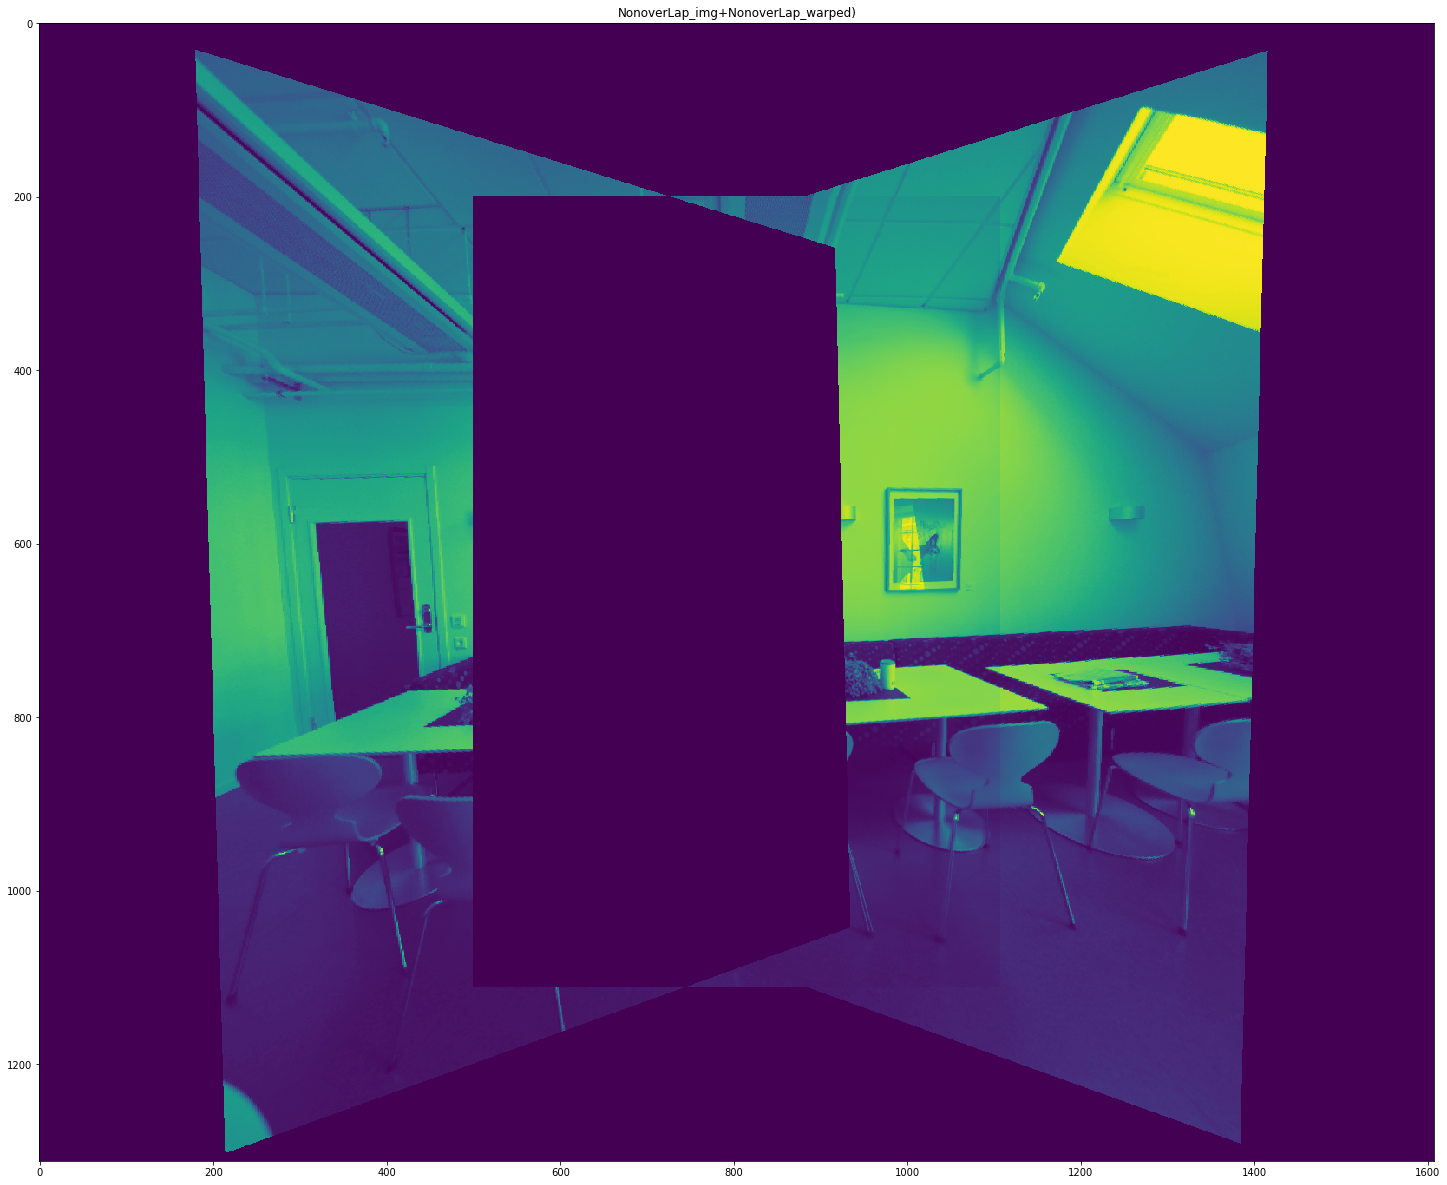

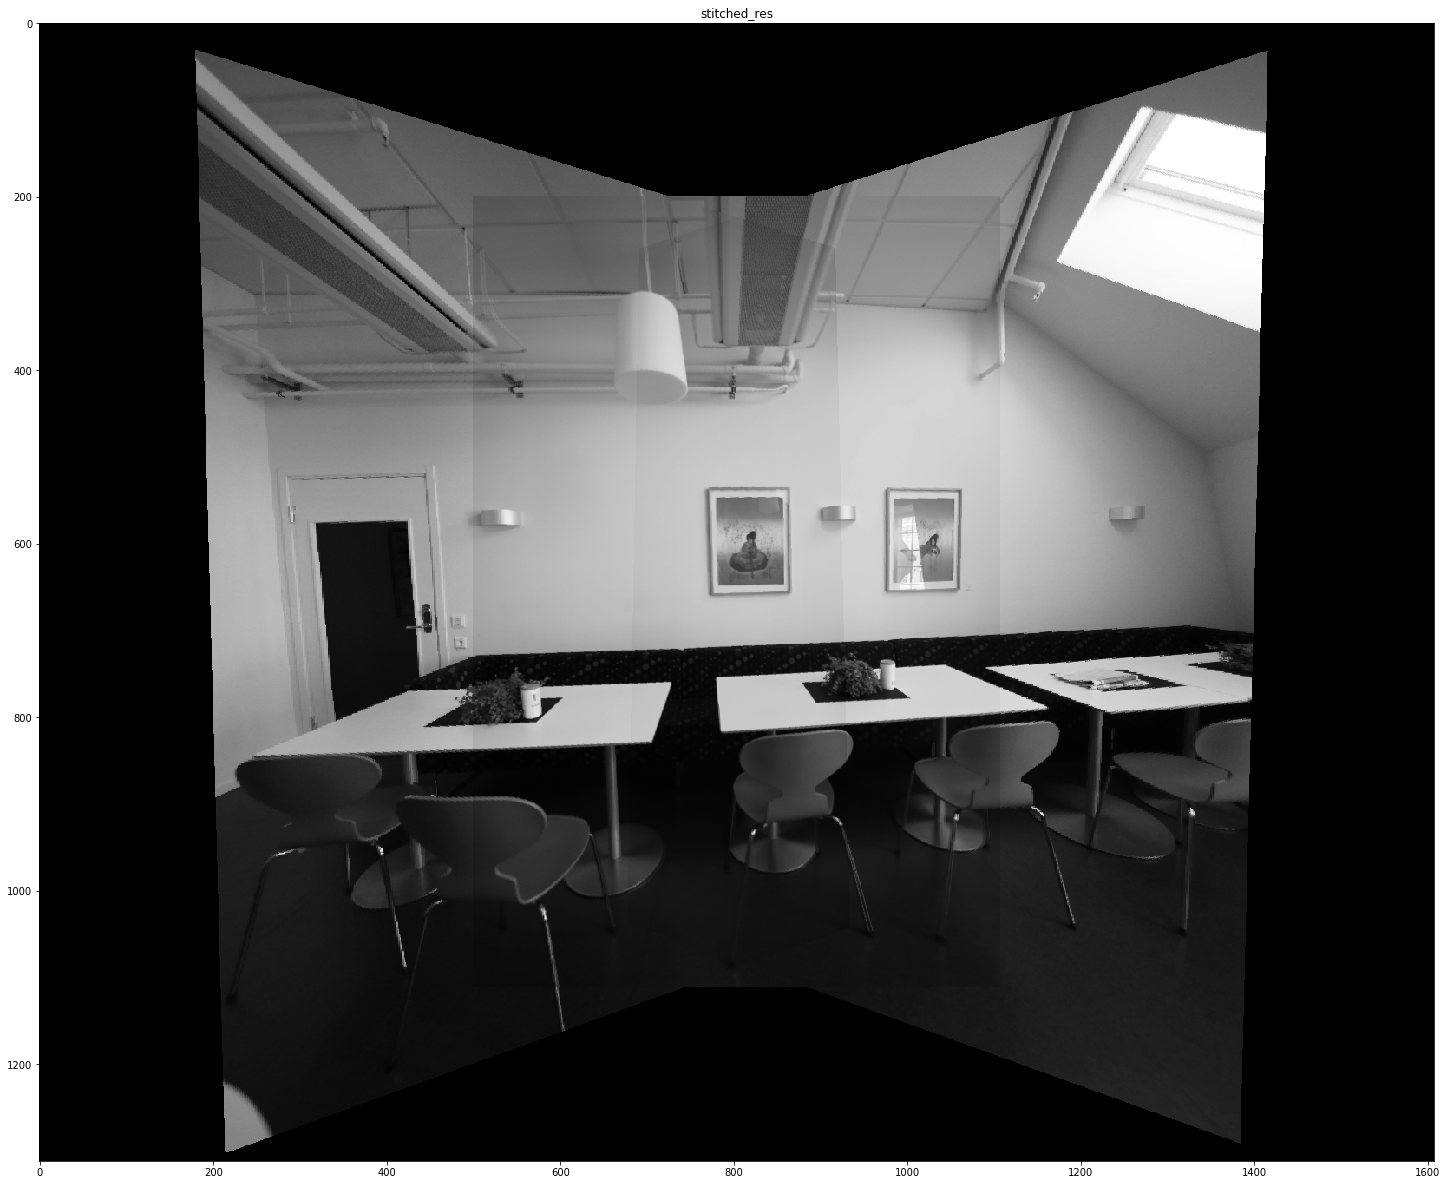

In [132]:
# perspective_warping(imgCenter, imgLeft, imgRight)

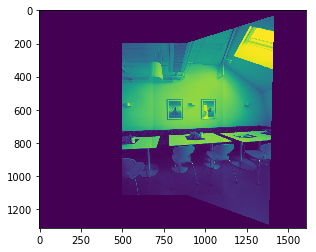

(<matplotlib.image.AxesImage at 0xf630e10>, None)

In [108]:
stitched_cr=toImage(stitched_cr)
plt.imshow(stitched_cr),plt.show('gray')

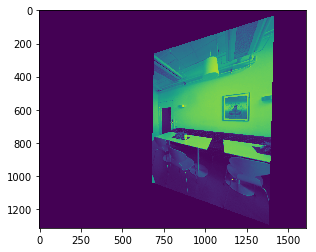

(<matplotlib.image.AxesImage at 0xf505198>, None)

In [113]:
T_L2CR, img_match2 = getTransform(stitched_cr,imgLeft)
row=stitched_cr.shape[0]
col=stitched_cr.shape[1]
warp_left=cv2.warpPerspective(imgLeft, H, (col,row), cv2.WARP_FILL_OUTLIERS, 200) 
plt.imshow(warp_left),plt.show('gray')

<type 'numpy.ndarray'>
(226L, 1L)
Transformation Matrix = 
[[  2.15869817e+00   3.97548798e-02   1.80640064e+02]
 [  6.43024813e-01   1.40559614e+00   3.20884849e+01]
 [  1.03084043e-03   9.29263321e-06   1.00000000e+00]]


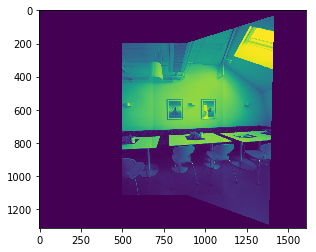

(-0.5, 1607.5, 1311.5, -0.5)

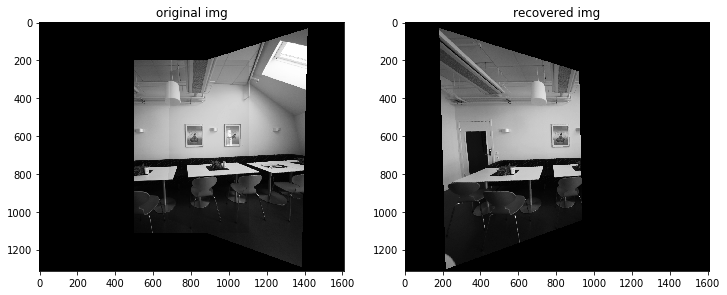

In [114]:
img_input=stitched_cr
rotated_img=imgLeft
print(type(rotated_img))
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img_input,None)
kp2, des2 = sift.detectAndCompute(rotated_img,None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
good_matches = [] # Append filtered matches to this list
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append(m)
if len(good_matches) > 4:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
    rot, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC,5.0) #cv2.RANSAC
    print(mask.shape)
    print "Transformation Matrix = \n", rot  
    # mapping rotataed image back with the calculated rotation matrix
    # ===== This is your fourth output =====
    width=img_input.shape[0]
    height=img_input.shape[1]
    res5=cv2.warpPerspective(rotated_img, rot, (height,width), cv2.WARP_FILL_OUTLIERS, 200)
else:
    print "Not enough matches are found - %d/%d" % (len(good_matches),4)
    
plt.imshow(img_input),plt.show('gray')
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(img_input, 'gray')
plt.title('original img')
plt.axis('on')    
plt.subplot(1, 2, 2)
plt.imshow(res5, 'gray')
plt.title('recovered img')  
plt.axis('on')